 #  Importing Libraries 

In [126]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt


#  Data Importing

In [127]:
# Importing customers file as 'hd_customers'.
hd_customers = pd.read_excel('C:\\Users\\mathp\\Desktop\\Bootcamp\\week2\\hd_customers.xlsx')

In [128]:
# Importing orders file as 'hd_orders'.
hd_orders = pd.read_csv('C:\\Users\\mathp\\Desktop\\Bootcamp\\week2\\hd_orders.csv')

# Basic Operations

In [129]:
# Checking the customers file is imported correctly.
hd_customers

,id,first_name,last_name,age,city,email
0,1001,Samuel,Zavala,139,Dublin,Zavala_Samuel46@xfinity.com
1,1002,Sara,Lee,33,Dublin,Sara.L@hotmail.com
2,1003,Michael,Davidson,23,Dublin,MichaelDavidson82@att.com
3,1004,Willie,Sims,29,Sligo,Willie_S@yahoo.com
4,1005,Carly,Armstrong,22,Mayo,CArmstrong@mail.com
...,...,...,...,...,...,...
401,1402,Sheila,Gibson,27,Dublin,Gibson.Sheila@gmail.com
402,1403,Julie,Thomas,28,Waterford,JThomas@mail.com
403,1404,Sarah,Juarez,55,Dublin,SJuarez71@verizon.com
404,1405,Tony,Richardson,24,Dublin,Richardson.Tony@yandex.com


In [130]:
# Checking the orders file is imported correctly.
hd_orders

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status
0,100001,26/11/2021 18:22,26/11/2021 18:49,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,20.0,COMPLETED
1,100002,11/07/2021 21:23,11/07/2021 21:53,43,219,1017,Cork,False,NaN,69.40,NaN,COMPLETED
2,100003,27/04/2021 17:28,27/04/2021 17:55,299,48,1019,Dublin,False,NaN,47.16,NaN,COMPLETED
3,100004,22/02/2021 18:08,22/02/2021 18:35,320,233,1020,Dublin,False,NaN,47.15,NaN,COMPLETED
4,100005,21/06/2021 18:14,21/06/2021 18:44,41,207,1024,Dublin,False,NaN,47.00,NaN,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
993,100994,28/12/2022 23:55,29/12/2022 00:31,48,11,1066,Kerry,False,NaN,20.63,NaN,COMPLETED
994,100995,29/12/2022 17:43,29/12/2022 18:19,154,114,1360,Sligo,False,NaN,28.84,NaN,COMPLETED
995,100996,29/12/2022 17:43,29/12/2022 18:19,431,205,1222,Kerry,False,NaN,35.74,NaN,COMPLETED
996,100997,29/12/2022 17:52,29/12/2022 18:34,195,20,1009,Sligo,False,NaN,107.03,NaN,COMPLETED


# Data cleaning for 'hd_customers' file

In [131]:
# Checking for all columns name in correct typos and consistent format.
hd_customers.columns

Index(['id', 'first_name', 'last_name', 'age', 'city', 'email'], dtype='object')

In [132]:
# Checking the total rows and columns
hd_customers.shape

(406, 6)

In [17]:
# Handling of duplicates in 'id' column.
hd_customers['id'].nunique()


406

In [18]:
hd_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 406 entries, 0 to 405
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          406 non-null    int64 
 1   first_name  406 non-null    object
 2   last_name   406 non-null    object
 3   age         406 non-null    int64 
 4   city        406 non-null    object
 5   email       406 non-null    object
dtypes: int64(2), object(4)
memory usage: 19.2+ KB


In [19]:
# Identify the missing values
hd_customers.isnull().sum()

id            0
first_name    0
last_name     0
age           0
city          0
email         0
dtype: int64

In [20]:
hd_customers['age']

0      139
1       33
2       23
3       29
4       22
      ... 
401     27
402     28
403     55
404     24
405     22
Name: age, Length: 406, dtype: int64

In [21]:
# Checking the distribution of the column'age'.
hd_customers['age'].value_counts()

age
22     41
23     35
21     30
24     26
26     26
28     26
30     23
31     21
25     19
33     19
27     15
32     14
29     13
20     13
34     13
19     11
18      8
37      5
35      3
58      3
43      2
36      2
55      2
41      2
45      2
38      2
6       2
42      2
59      2
68      2
67      2
49      2
60      1
62      1
40      1
46      1
75      1
61      1
70      1
139     1
44      1
57      1
53      1
47      1
54      1
8       1
150     1
66      1
71      1
160     1
Name: count, dtype: int64

In [22]:
hd_customers.describe()

,id,age
count,406.000000,406.000000
mean,1203.500000,29.354680
std,117.346353,14.347274
min,1001.000000,6.000000
25%,1102.250000,22.000000
50%,1203.500000,26.000000
75%,1304.750000,31.000000
max,1406.000000,160.000000


<Axes: xlabel='age'>

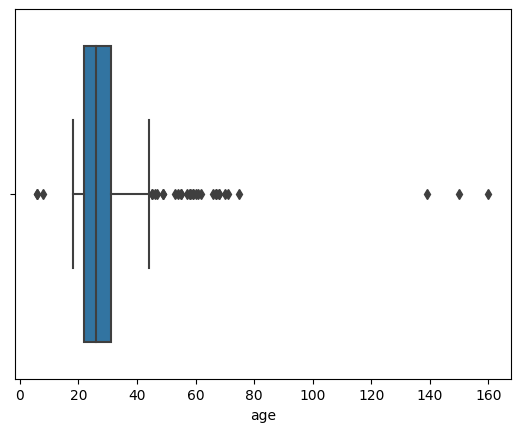

In [23]:
# Checking the outliers in the column 'age' by boxplot method.
sns.boxplot(x = 'age', data = hd_customers)

In [24]:
# FILTER THE DATAFRAME
# Handling of outliers.
# Applying a filter to check the age comes under outliers(below and above).
hd_customers.loc[(hd_customers['age'] < 18) | (hd_customers['age'] > 100)]

,id,first_name,last_name,age,city,email
0,1001,Samuel,Zavala,139,Dublin,Zavala_Samuel46@xfinity.com
30,1031,Jessica,Hendricks,150,Dublin,Jessica.H85@xfinity.com
59,1060,Amy,Farmer,8,Kerry,Farmer.Amy@verizon.com
70,1071,David,Gibson,160,Dublin,DavidGibson@xfinity.com
102,1103,Andrew,Craig,6,Dublin,Andrew.C74@yahoo.com
164,1165,Christopher,Ramsey,6,Waterford,Ramsey_Christopher@hotmail.com


In [25]:
# Now applying again a filter to remove outliers.
# And save the clean data to new variable.
hd_customers_cleandata = hd_customers.loc[(hd_customers['age'] >= 18) & (hd_customers['age'] <= 100)]

In [26]:
# Now the outliers are excluded and the total row is 400 / 406
hd_customers_cleandata.shape

(400, 6)

In [27]:
hd_customers.shape

(406, 6)

In [28]:
hd_customers_cleandata.describe()

,id,age
count,400.000000,400.000000
mean,1205.475000,28.622500
std,116.924496,9.753863
min,1002.000000,18.000000
25%,1105.750000,22.000000
50%,1206.500000,26.000000
75%,1306.250000,31.000000
max,1406.000000,75.000000


# Data cleaning for 'hd_orders' file


In [29]:
hd_orders

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status
0,100001,26/11/2021 18:22,26/11/2021 18:49,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,20.0,COMPLETED
1,100002,11/07/2021 21:23,11/07/2021 21:53,43,219,1017,Cork,False,NaN,69.40,NaN,COMPLETED
2,100003,27/04/2021 17:28,27/04/2021 17:55,299,48,1019,Dublin,False,NaN,47.16,NaN,COMPLETED
3,100004,22/02/2021 18:08,22/02/2021 18:35,320,233,1020,Dublin,False,NaN,47.15,NaN,COMPLETED
4,100005,21/06/2021 18:14,21/06/2021 18:44,41,207,1024,Dublin,False,NaN,47.00,NaN,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
993,100994,28/12/2022 23:55,29/12/2022 00:31,48,11,1066,Kerry,False,NaN,20.63,NaN,COMPLETED
994,100995,29/12/2022 17:43,29/12/2022 18:19,154,114,1360,Sligo,False,NaN,28.84,NaN,COMPLETED
995,100996,29/12/2022 17:43,29/12/2022 18:19,431,205,1222,Kerry,False,NaN,35.74,NaN,COMPLETED
996,100997,29/12/2022 17:52,29/12/2022 18:34,195,20,1009,Sligo,False,NaN,107.03,NaN,COMPLETED


In [30]:
## Checking for all columns name in correct typos and consistent format.
hd_orders.columns

Index(['order_id', 'order_timestamp', 'delivered_timestamp', 'driver_id',
       'restaurant_id', 'cust_id', 'delivery_region', 'discount_applied',
       'discount_code', 'order_total', 'discount_pc', 'status'],
      dtype='object')

In [31]:
# Checking the total rows and columns
hd_orders.shape

(998, 12)

In [32]:
hd_orders.isnull().sum()

order_id                 0
order_timestamp          0
delivered_timestamp      7
driver_id                0
restaurant_id            0
cust_id                  0
delivery_region          0
discount_applied         0
discount_code          906
order_total              0
discount_pc            906
status                   0
dtype: int64

In [33]:
hd_orders['order_id'].nunique()

998

In [34]:
hd_delivery_null = hd_orders.loc[hd_orders['delivered_timestamp'].isnull()]

In [35]:
hd_delivery_null

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status
30,100031,22/07/2021 23:42,NaN,66,63,1081,Cork,False,NaN,42.87,NaN,CANCELLED
64,100065,02/03/2021 20:12,NaN,204,241,1153,Dublin,False,NaN,39.11,NaN,CANCELLED
116,100117,17/10/2021 17:34,NaN,232,188,1190,Kerry,False,NaN,33.02,NaN,CANCELLED
175,100176,08/10/2021 18:11,NaN,216,20,1363,Cork,False,NaN,28.62,NaN,CANCELLED
206,100207,10/11/2021 21:35,NaN,353,3,1393,Dublin,False,NaN,25.03,NaN,CANCELLED
241,100242,01/01/2021 20:16,NaN,288,233,1285,Dublin,False,NaN,22.73,NaN,CANCELLED
954,100955,15/12/2022 17:03,NaN,368,104,1073,Sligo,False,NaN,29.33,NaN,CANCELLED


In [36]:
# 7 Null / 998
hd_delivery_null = hd_orders['delivered_timestamp'].isnull()
hd_orders_cleandata =  hd_orders.loc[~hd_delivery_null,:]

In [37]:
hd_orders_cleandata.isnull().sum()

order_id                 0
order_timestamp          0
delivered_timestamp      0
driver_id                0
restaurant_id            0
cust_id                  0
delivery_region          0
discount_applied         0
discount_code          899
order_total              0
discount_pc            899
status                   0
dtype: int64

In [38]:
# Noticed that after removing the null value 'NaN' for delivered_timestamp is might because of cancelling the order.
# 7 cancelled/ 998
hd_orders['status'].value_counts()

status
COMPLETED    991
CANCELLED      7
Name: count, dtype: int64

In [39]:
hd_orders_cleandata

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status
0,100001,26/11/2021 18:22,26/11/2021 18:49,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,20.0,COMPLETED
1,100002,11/07/2021 21:23,11/07/2021 21:53,43,219,1017,Cork,False,NaN,69.40,NaN,COMPLETED
2,100003,27/04/2021 17:28,27/04/2021 17:55,299,48,1019,Dublin,False,NaN,47.16,NaN,COMPLETED
3,100004,22/02/2021 18:08,22/02/2021 18:35,320,233,1020,Dublin,False,NaN,47.15,NaN,COMPLETED
4,100005,21/06/2021 18:14,21/06/2021 18:44,41,207,1024,Dublin,False,NaN,47.00,NaN,COMPLETED
...,...,...,...,...,...,...,...,...,...,...,...,...
993,100994,28/12/2022 23:55,29/12/2022 00:31,48,11,1066,Kerry,False,NaN,20.63,NaN,COMPLETED
994,100995,29/12/2022 17:43,29/12/2022 18:19,154,114,1360,Sligo,False,NaN,28.84,NaN,COMPLETED
995,100996,29/12/2022 17:43,29/12/2022 18:19,431,205,1222,Kerry,False,NaN,35.74,NaN,COMPLETED
996,100997,29/12/2022 17:52,29/12/2022 18:34,195,20,1009,Sligo,False,NaN,107.03,NaN,COMPLETED


In [40]:
hd_orders_cleandata.isnull().sum()

order_id                 0
order_timestamp          0
delivered_timestamp      0
driver_id                0
restaurant_id            0
cust_id                  0
delivery_region          0
discount_applied         0
discount_code          899
order_total              0
discount_pc            899
status                   0
dtype: int64

In [41]:
hd_orders_cleandata['discount_code'].value_counts()

discount_code
BLACKFRIDAY22    46
BLACKFRIDAY21    25
HAPPYBIRTHDAY    21
Name: count, dtype: int64

In [42]:
hd_orders_cleandata['discount_pc'].value_counts()

discount_pc
20.0    71
10.0    21
Name: count, dtype: int64

In [43]:
# Next to fill the null in the columns 'discount_code' and 'discount_pc'
hd_orders_cleandata.loc[:,'discount_code'] = hd_orders_cleandata['discount_code'].fillna('No')

In [44]:
hd_orders_cleandata.loc[:,'discount_pc'] = hd_orders_cleandata['discount_pc'].fillna(0)

In [45]:
hd_orders_cleandata.head(20)

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status
0,100001,26/11/2021 18:22,26/11/2021 18:49,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,20.0,COMPLETED
1,100002,11/07/2021 21:23,11/07/2021 21:53,43,219,1017,Cork,False,No,69.40,0.0,COMPLETED
2,100003,27/04/2021 17:28,27/04/2021 17:55,299,48,1019,Dublin,False,No,47.16,0.0,COMPLETED
3,100004,22/02/2021 18:08,22/02/2021 18:35,320,233,1020,Dublin,False,No,47.15,0.0,COMPLETED
4,100005,21/06/2021 18:14,21/06/2021 18:44,41,207,1024,Dublin,False,No,47.00,0.0,COMPLETED
5,100006,15/08/2021 18:15,15/08/2021 18:45,154,83,1025,Cork,False,No,46.88,0.0,COMPLETED
6,100007,27/08/2021 19:18,27/08/2021 19:48,160,194,1028,Cork,False,No,46.78,0.0,COMPLETED
7,100008,18/12/2021 18:52,18/12/2021 19:19,60,83,1013,Dublin,False,No,46.67,0.0,COMPLETED
8,100009,17/11/2021 19:30,17/11/2021 19:57,172,228,1017,Dublin,False,No,46.56,0.0,COMPLETED
9,100010,29/05/2021 17:09,29/05/2021 17:36,373,9,1019,Dublin,False,No,46.40,0.0,COMPLETED


In [46]:
hd_orders_cleandata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 991 entries, 0 to 997
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   order_id             991 non-null    int64  
 1   order_timestamp      991 non-null    object 
 2   delivered_timestamp  991 non-null    object 
 3   driver_id            991 non-null    int64  
 4   restaurant_id        991 non-null    int64  
 5   cust_id              991 non-null    int64  
 6   delivery_region      991 non-null    object 
 7   discount_applied     991 non-null    bool   
 8   discount_code        991 non-null    object 
 9   order_total          991 non-null    float64
 10  discount_pc          991 non-null    float64
 11  status               991 non-null    object 
dtypes: bool(1), float64(2), int64(4), object(5)
memory usage: 93.9+ KB


In [47]:
hd_orders_cleandata.head()

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status
0,100001,26/11/2021 18:22,26/11/2021 18:49,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,20.0,COMPLETED
1,100002,11/07/2021 21:23,11/07/2021 21:53,43,219,1017,Cork,False,No,69.40,0.0,COMPLETED
2,100003,27/04/2021 17:28,27/04/2021 17:55,299,48,1019,Dublin,False,No,47.16,0.0,COMPLETED
3,100004,22/02/2021 18:08,22/02/2021 18:35,320,233,1020,Dublin,False,No,47.15,0.0,COMPLETED
4,100005,21/06/2021 18:14,21/06/2021 18:44,41,207,1024,Dublin,False,No,47.00,0.0,COMPLETED


In [48]:
import warnings
warnings.filterwarnings('ignore')

In [49]:
len(hd_orders_cleandata)

991

In [50]:
hd_orders_cleandata['delivered_timestamp'] = pd.to_datetime(hd_orders_cleandata.delivered_timestamp, format= '%d/%m/%Y %H:%M')

In [51]:
hd_orders_cleandata['order_timestamp'] = pd.to_datetime(hd_orders_cleandata.order_timestamp, format= '%d/%m/%Y %H:%M')

In [52]:
hd_orders_cleandata.loc[:, 'order_timestamp'] = pd.to_datetime(hd_orders_cleandata['order_timestamp'], format='%d/%m/%Y %H:%M')
hd_orders_cleandata.loc[:, 'delivered_timestamp'] = pd.to_datetime(hd_orders_cleandata['delivered_timestamp'], format='%d/%m/%Y %H:%M')

In [53]:
hd_orders_cleandata.dtypes

order_id                        int64
order_timestamp        datetime64[ns]
delivered_timestamp    datetime64[ns]
driver_id                       int64
restaurant_id                   int64
cust_id                         int64
delivery_region                object
discount_applied                 bool
discount_code                  object
order_total                   float64
discount_pc                   float64
status                         object
dtype: object

In [54]:
# Actual payment for order needs to be calculated.
# Actual_payment = order_total-discount_pc.
hd_orders_cleandata['actual_payment'] = hd_orders_cleandata['order_total']-(hd_orders_cleandata['order_total']* hd_orders_cleandata['discount_pc'])/100  


In [55]:
hd_orders_cleandata

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,actual_payment
0,100001,2021-11-26 18:22:00,2021-11-26 18:49:00,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,20.0,COMPLETED,55.568
1,100002,2021-07-11 21:23:00,2021-07-11 21:53:00,43,219,1017,Cork,False,No,69.40,0.0,COMPLETED,69.400
2,100003,2021-04-27 17:28:00,2021-04-27 17:55:00,299,48,1019,Dublin,False,No,47.16,0.0,COMPLETED,47.160
3,100004,2021-02-22 18:08:00,2021-02-22 18:35:00,320,233,1020,Dublin,False,No,47.15,0.0,COMPLETED,47.150
4,100005,2021-06-21 18:14:00,2021-06-21 18:44:00,41,207,1024,Dublin,False,No,47.00,0.0,COMPLETED,47.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,100994,2022-12-28 23:55:00,2022-12-29 00:31:00,48,11,1066,Kerry,False,No,20.63,0.0,COMPLETED,20.630
994,100995,2022-12-29 17:43:00,2022-12-29 18:19:00,154,114,1360,Sligo,False,No,28.84,0.0,COMPLETED,28.840
995,100996,2022-12-29 17:43:00,2022-12-29 18:19:00,431,205,1222,Kerry,False,No,35.74,0.0,COMPLETED,35.740
996,100997,2022-12-29 17:52:00,2022-12-29 18:34:00,195,20,1009,Sligo,False,No,107.03,0.0,COMPLETED,107.030


In [56]:
hd_orders_cleandata.loc[:,'year'] = hd_orders_cleandata['order_timestamp'].dt.year
hd_orders_cleandata.loc[:,'month'] = hd_orders_cleandata['order_timestamp'].dt.month

In [57]:
hd_orders_cleandata

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,actual_payment,year,month
0,100001,2021-11-26 18:22:00,2021-11-26 18:49:00,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,20.0,COMPLETED,55.568,2021,11
1,100002,2021-07-11 21:23:00,2021-07-11 21:53:00,43,219,1017,Cork,False,No,69.40,0.0,COMPLETED,69.400,2021,7
2,100003,2021-04-27 17:28:00,2021-04-27 17:55:00,299,48,1019,Dublin,False,No,47.16,0.0,COMPLETED,47.160,2021,4
3,100004,2021-02-22 18:08:00,2021-02-22 18:35:00,320,233,1020,Dublin,False,No,47.15,0.0,COMPLETED,47.150,2021,2
4,100005,2021-06-21 18:14:00,2021-06-21 18:44:00,41,207,1024,Dublin,False,No,47.00,0.0,COMPLETED,47.000,2021,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,100994,2022-12-28 23:55:00,2022-12-29 00:31:00,48,11,1066,Kerry,False,No,20.63,0.0,COMPLETED,20.630,2022,12
994,100995,2022-12-29 17:43:00,2022-12-29 18:19:00,154,114,1360,Sligo,False,No,28.84,0.0,COMPLETED,28.840,2022,12
995,100996,2022-12-29 17:43:00,2022-12-29 18:19:00,431,205,1222,Kerry,False,No,35.74,0.0,COMPLETED,35.740,2022,12
996,100997,2022-12-29 17:52:00,2022-12-29 18:34:00,195,20,1009,Sligo,False,No,107.03,0.0,COMPLETED,107.030,2022,12


# Question 1

In [58]:
# 1.Compare monthly 2021 sales to 2022 and determine has ‘Happy Deliveries’ sales grown.

In [59]:
hd_orders_cleandata.head()

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,actual_payment,year,month
0,100001,2021-11-26 18:22:00,2021-11-26 18:49:00,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,20.0,COMPLETED,55.568,2021,11
1,100002,2021-07-11 21:23:00,2021-07-11 21:53:00,43,219,1017,Cork,False,No,69.40,0.0,COMPLETED,69.400,2021,7
2,100003,2021-04-27 17:28:00,2021-04-27 17:55:00,299,48,1019,Dublin,False,No,47.16,0.0,COMPLETED,47.160,2021,4
3,100004,2021-02-22 18:08:00,2021-02-22 18:35:00,320,233,1020,Dublin,False,No,47.15,0.0,COMPLETED,47.150,2021,2
4,100005,2021-06-21 18:14:00,2021-06-21 18:44:00,41,207,1024,Dublin,False,No,47.00,0.0,COMPLETED,47.000,2021,6


In [60]:
# Spliting of dataframe into two new variable for sales by year.
sales_2021 =hd_orders_cleandata.loc[hd_orders_cleandata['year']== 2021]
sales_2022 =hd_orders_cleandata.loc[hd_orders_cleandata['year']== 2022]

In [61]:
sales_2021.head()

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,actual_payment,year,month
0,100001,2021-11-26 18:22:00,2021-11-26 18:49:00,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,20.0,COMPLETED,55.568,2021,11
1,100002,2021-07-11 21:23:00,2021-07-11 21:53:00,43,219,1017,Cork,False,No,69.40,0.0,COMPLETED,69.400,2021,7
2,100003,2021-04-27 17:28:00,2021-04-27 17:55:00,299,48,1019,Dublin,False,No,47.16,0.0,COMPLETED,47.160,2021,4
3,100004,2021-02-22 18:08:00,2021-02-22 18:35:00,320,233,1020,Dublin,False,No,47.15,0.0,COMPLETED,47.150,2021,2
4,100005,2021-06-21 18:14:00,2021-06-21 18:44:00,41,207,1024,Dublin,False,No,47.00,0.0,COMPLETED,47.000,2021,6


In [62]:
sales_2022.head()

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,actual_payment,year,month
400,100401,2022-01-03 17:06:00,2022-01-03 17:39:00,290,178,1155,Dublin,False,No,31.99,0.0,COMPLETED,31.99,2022,1
401,100402,2022-01-04 17:41:00,2022-01-04 18:20:00,174,183,1014,Dublin,False,No,28.78,0.0,COMPLETED,28.78,2022,1
402,100403,2022-01-08 20:11:00,2022-01-08 20:44:00,214,213,1198,Dublin,False,No,31.07,0.0,COMPLETED,31.07,2022,1
403,100404,2022-01-12 18:16:00,2022-01-12 18:49:00,200,47,1002,Dublin,False,No,20.63,0.0,COMPLETED,20.63,2022,1
404,100405,2022-01-12 18:41:00,2022-01-12 19:17:00,355,8,1249,Dublin,False,No,30.47,0.0,COMPLETED,30.47,2022,1


In [63]:
monthly_2021 = sales_2021.groupby('month')['actual_payment'].sum().to_frame('monthly_sales')
monthly_2022 = sales_2022.groupby('month')['actual_payment'].sum().to_frame('monthly_sales')

In [64]:
monthly_2021

,monthly_sales
month,
1,197.040
2,531.030
3,552.204
4,724.450
5,852.407
6,965.194
7,939.990
8,1195.704
9,516.010


In [65]:
monthly_2022

,monthly_sales
month,
1,358.430
2,743.610
3,1007.617
4,814.010
5,948.392
6,1443.540
7,1695.970
8,1423.040
9,408.440


Text(0, 0.5, 'Sales(€)')

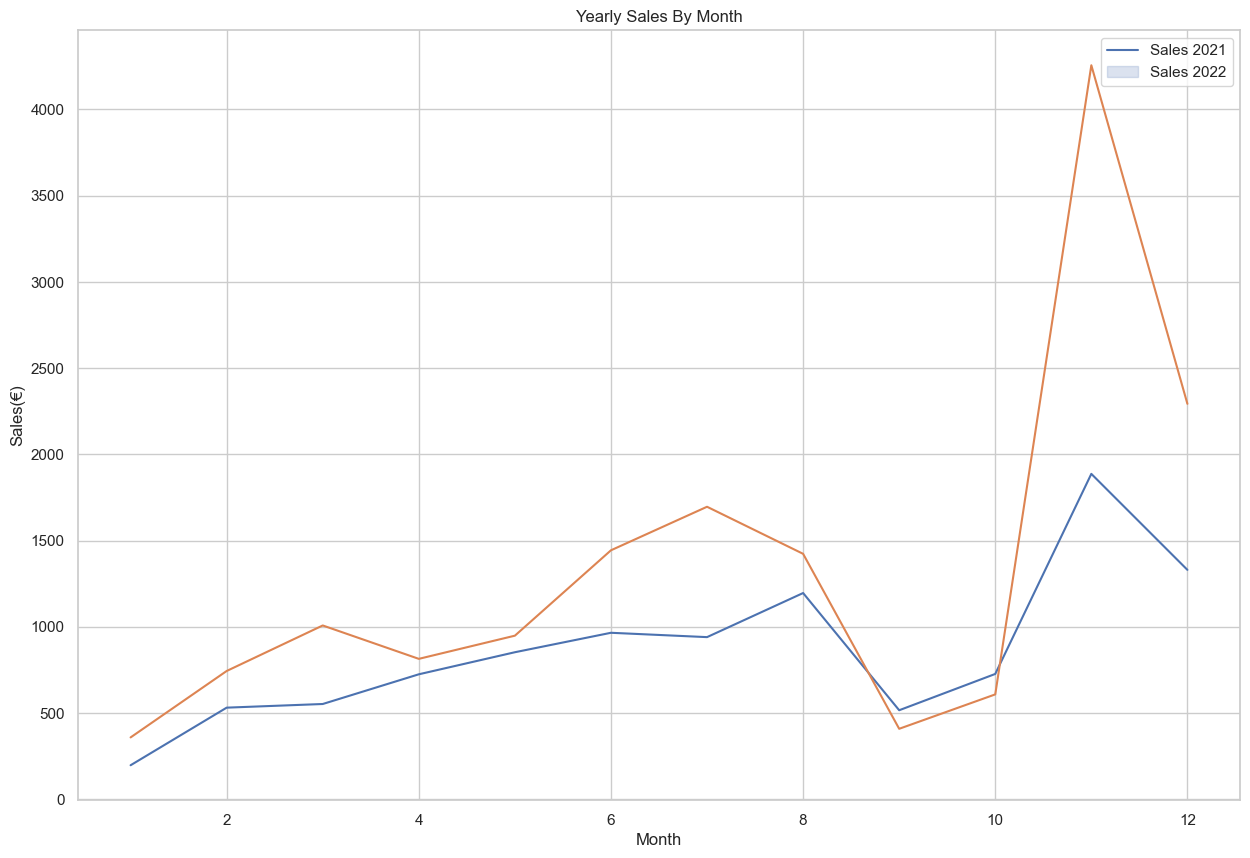

In [66]:
fig = plt.figure(figsize=(15,10))
labels = ['Sales 2021', 'Sales 2022']
sns.set(style = 'whitegrid')
ax = sns.lineplot(data = monthly_2021, x='month', y= 'monthly_sales', label ='2021'),
ax = sns.lineplot(data = monthly_2022, x='month', y= 'monthly_sales', label ='2022')
plt.legend(labels)
ax.set_title('Yearly Sales By Month')
ax.set_xlabel('Month')
ax.set_ylabel('Sales(€)')

# Question 2

In [67]:
#Looking to the loyalty card holders, what is the age distribution of those customers?

In [68]:
hd_customers_cleandata.head()

,id,first_name,last_name,age,city,email
1,1002,Sara,Lee,33,Dublin,Sara.L@hotmail.com
2,1003,Michael,Davidson,23,Dublin,MichaelDavidson82@att.com
3,1004,Willie,Sims,29,Sligo,Willie_S@yahoo.com
4,1005,Carly,Armstrong,22,Mayo,CArmstrong@mail.com
5,1006,Greg,Hardin,26,Leitrim,Hardin_Greg@gmail.com


Text(0.5, 1.0, 'Age Distribution of the Loyalty Card Customer')

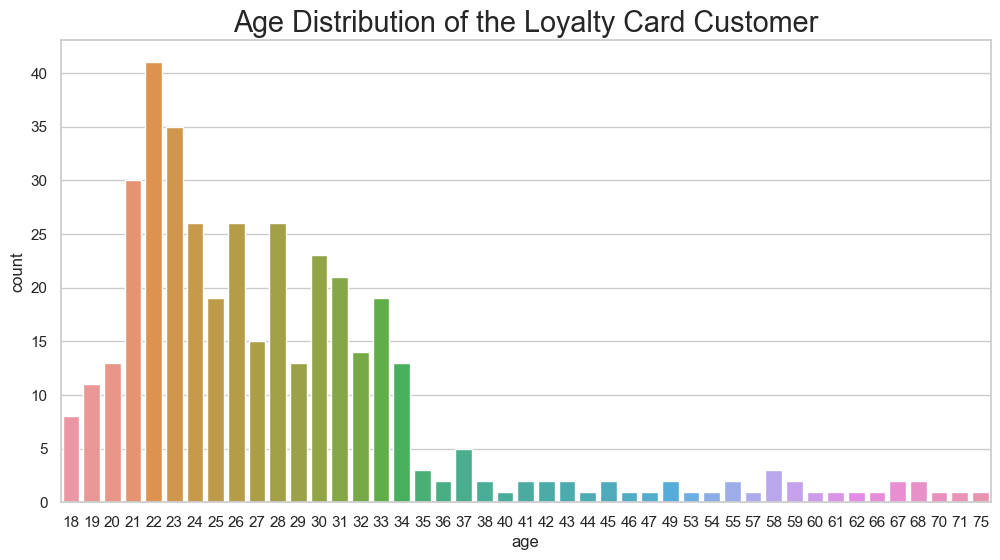

In [69]:
plt.figure(figsize=(12,6))
ax= sns.countplot(data = hd_customers_cleandata, x = 'age')
ax.set_title('Age Distribution of the Loyalty Card Customer', fontweight = 'ultralight', fontsize = 'xx-large')

# Question 3

In [70]:
# Is there a relationship between the amount spend by a loyalty card holder and their age?

In [71]:
merged = pd.merge(hd_orders_cleandata, hd_customers_cleandata, left_on = 'cust_id', right_on = 'id', how = 'inner' )

In [72]:
merged

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,...,status,actual_payment,year,month,id,first_name,last_name,age,city,email
0,100001,2021-11-26 18:22:00,2021-11-26 18:49:00,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,...,COMPLETED,55.568,2021,11,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net
1,100328,2021-06-05 20:38:00,2021-06-05 21:08:00,351,140,1016,Dublin,False,No,16.55,...,COMPLETED,16.550,2021,6,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net
2,100500,2022-04-30 21:03:00,2022-04-30 21:39:00,175,48,1016,Dublin,False,No,46.62,...,COMPLETED,46.620,2022,4,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net
3,100753,2022-11-02 19:15:00,2022-11-02 19:49:00,168,321,1016,Galway,False,No,26.66,...,COMPLETED,26.660,2022,11,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net
4,100002,2021-07-11 21:23:00,2021-07-11 21:53:00,43,219,1017,Cork,False,No,69.40,...,COMPLETED,69.400,2021,7,1017,Mr.,Joseph,23,Limerick,MHorne@zoho.com
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
967,100963,2022-12-17 20:39:00,2022-12-17 21:15:00,279,109,1200,Kerry,False,No,36.42,...,COMPLETED,36.420,2022,12,1200,Courtney,White,22,Dublin,CourtneyWhite51@mail.com
968,100967,2022-12-20 20:39:00,2022-12-20 21:15:00,365,89,1248,Sligo,False,No,34.17,...,COMPLETED,34.170,2022,12,1248,Jamie,Alexander,21,Galway,Jamie.A83@yahoo.com
969,100974,2022-12-23 17:05:00,2022-12-23 17:41:00,99,83,1149,Kerry,False,No,39.50,...,COMPLETED,39.500,2022,12,1149,Joseph,Smith,24,Dublin,JosephSmith@yahoo.com
970,100978,2022-12-24 21:28:00,2022-12-24 22:10:00,163,10,1188,Sligo,False,No,37.21,...,COMPLETED,37.210,2022,12,1188,Christine,Irwin,23,Dublin,ChristineIrwin51@outlook.com


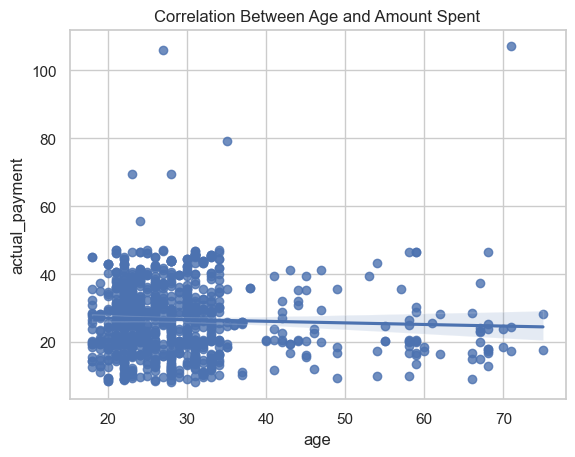

In [73]:
# Create the scatter plot with a regression line
sns.regplot(data=merged, x='age', y= 'actual_payment')

# Set the plot title and axis labels
plt.title('Correlation Between Age and Amount Spent')
plt.xlabel('age')
plt.ylabel('actual_payment')
plt.show()

In [74]:
merged.groupby(['cust_id','age'])['actual_payment'].sum()

cust_id  age
1002     33     42.89
1003     23     38.16
1004     29     49.09
1005     22     66.98
1006     26     40.38
                ...  
1402     27     24.92
1403     28     24.71
1404     55     24.63
1405     24     24.49
1406     22     24.49
Name: actual_payment, Length: 399, dtype: float64

In [75]:
amount_spent = merged.groupby(['cust_id','age'])['actual_payment'].sum().to_frame('total_spent')

In [76]:
amount_spent.reset_index(inplace = True)

In [77]:
amount_spent

,cust_id,age,total_spent
0,1002,33,42.89
1,1003,23,38.16
2,1004,29,49.09
3,1005,22,66.98
4,1006,26,40.38
...,...,...,...
394,1402,27,24.92
395,1403,28,24.71
396,1404,55,24.63
397,1405,24,24.49


Text(0.5, 1.0, 'Age vs Actual Payment')

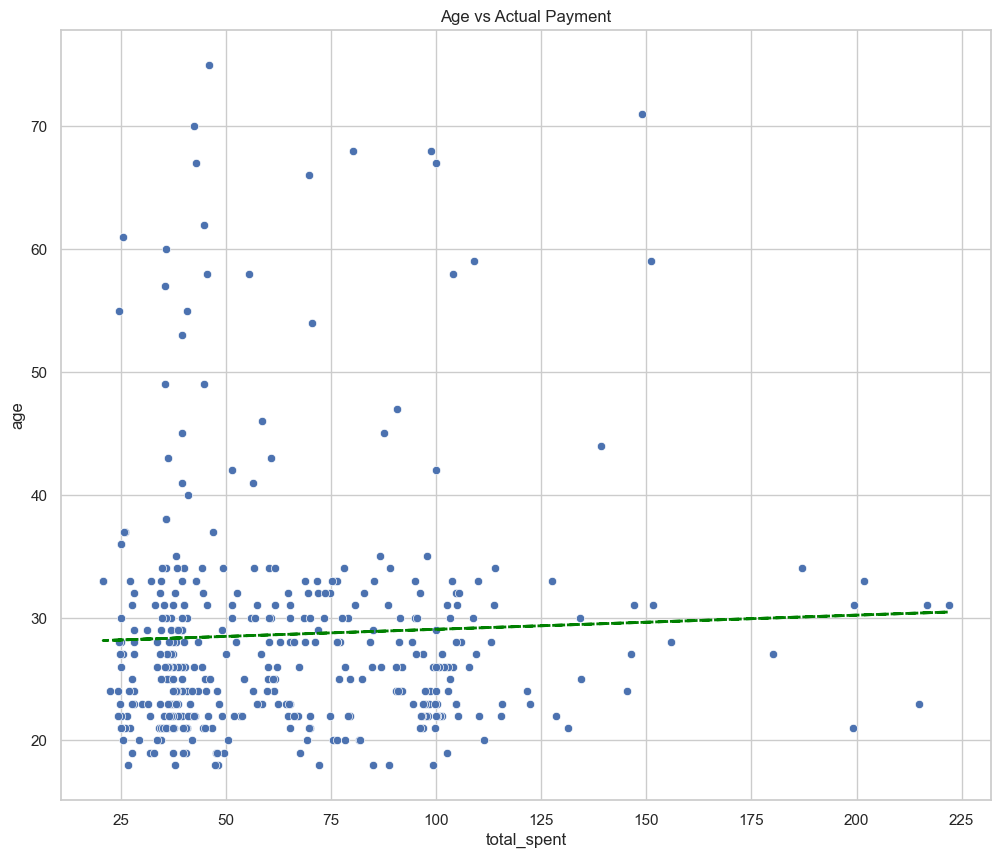

In [78]:
plt.figure(figsize =(12,10))
ax = sns.scatterplot(data = amount_spent, x=amount_spent['total_spent'], y= amount_spent['age'])
x = amount_spent['total_spent']
y = amount_spent['age']
a,b = np.polyfit(x,y, 1)
ax.plot(x, a*x+b,  color='green', linestyle='--', linewidth=2)
plt.title('Age vs Actual Payment')

# Question 4

In [79]:
# Is there a relationship between the amount of a payment, the age of a person
# and whether or not they used discount codes (HINT: scatterplot with 3 layers )

In [80]:
amount_spent_code = merged[['age', 'discount_applied', 'actual_payment']]

In [81]:
amount_spent_code

,age,discount_applied,actual_payment
0,24,True,55.568
1,24,False,16.550
2,24,False,46.620
3,24,False,26.660
4,23,False,69.400
...,...,...,...
967,22,False,36.420
968,21,False,34.170
969,24,False,39.500
970,23,False,37.210


Text(0, 0.5, 'Age')

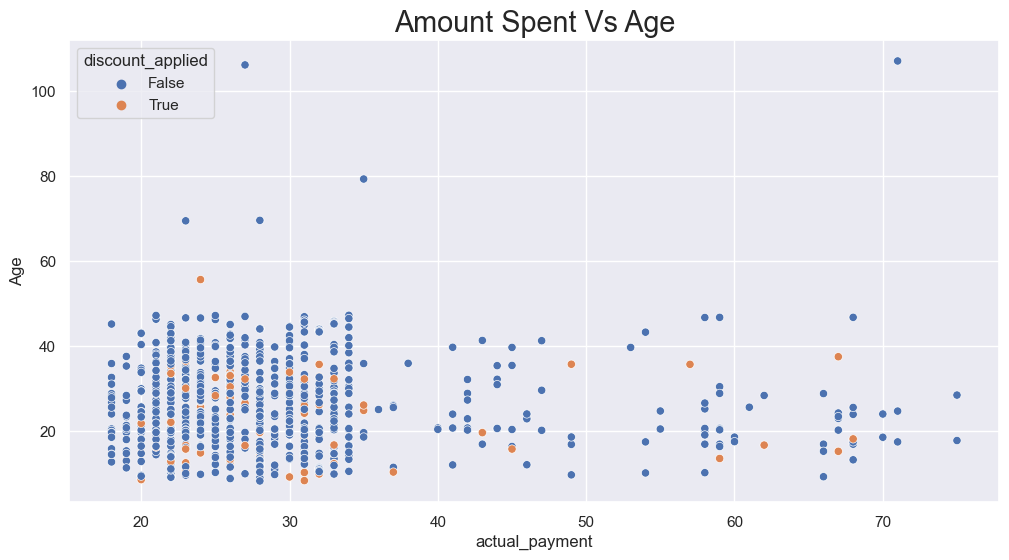

In [82]:
fig = plt.figure(figsize=(12,6))
sns.set(style="darkgrid")
ax = sns.scatterplot(x='age', y = 'actual_payment', data = amount_spent_code, hue = 'discount_applied')

ax.set_title('Amount Spent Vs Age', fontweight ='ultralight', fontsize = 'xx-large')
ax.set_xlabel('actual_payment')
ax.set_ylabel('Age')

# Question 5

In [83]:
# Compare the sales for 2022 across all regions.

In [84]:
sales_2022.head()

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,actual_payment,year,month
400,100401,2022-01-03 17:06:00,2022-01-03 17:39:00,290,178,1155,Dublin,False,No,31.99,0.0,COMPLETED,31.99,2022,1
401,100402,2022-01-04 17:41:00,2022-01-04 18:20:00,174,183,1014,Dublin,False,No,28.78,0.0,COMPLETED,28.78,2022,1
402,100403,2022-01-08 20:11:00,2022-01-08 20:44:00,214,213,1198,Dublin,False,No,31.07,0.0,COMPLETED,31.07,2022,1
403,100404,2022-01-12 18:16:00,2022-01-12 18:49:00,200,47,1002,Dublin,False,No,20.63,0.0,COMPLETED,20.63,2022,1
404,100405,2022-01-12 18:41:00,2022-01-12 19:17:00,355,8,1249,Dublin,False,No,30.47,0.0,COMPLETED,30.47,2022,1


In [85]:
sales_2022['delivery_region'].value_counts()

delivery_region
Dublin     270
Cork       123
Galway     101
Kerry       53
Sligo       32
Leitrim     18
Name: count, dtype: int64

In [86]:
sales_by_region =sales_2022.groupby('delivery_region')['actual_payment'].sum().to_frame('sales_total')

In [87]:
sales_by_region

,sales_total
delivery_region,
Cork,3528.877
Dublin,6940.058
Galway,2752.460
Kerry,1399.640
Leitrim,493.890
Sligo,885.080


In [88]:
sales_by_region.sort_values(by='sales_total',ascending=False)

,sales_total
delivery_region,
Dublin,6940.058
Cork,3528.877
Galway,2752.460
Kerry,1399.640
Sligo,885.080
Leitrim,493.890


In [89]:
sales_by_region.columns

Index(['sales_total'], dtype='object')

In [90]:
sales_by_region.reset_index(inplace = True)

In [91]:
sales_by_region.columns

Index(['delivery_region', 'sales_total'], dtype='object')

Text(0, 0.5, 'Sales (€)')

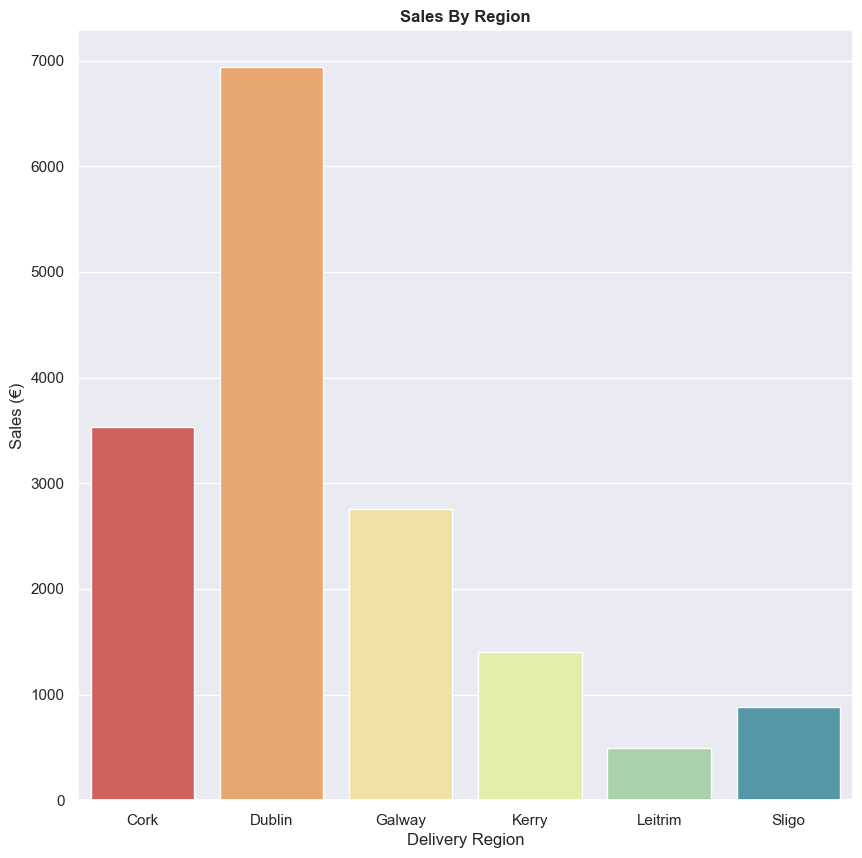

In [92]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.set(style="darkgrid")
sns.barplot(data =sales_by_region, x = sales_by_region['delivery_region'], y =sales_by_region["sales_total"], palette = "Spectral")
ax.set_title('Sales By Region', fontweight ='bold')
ax.set_xlabel('Delivery Region')
ax.set_ylabel('Sales (€)')

In [93]:
total_sales = sales_2022['actual_payment'].sum()

In [94]:
total_sales

16000.005000000001

# Question 6

In [95]:
# Christmas is coming and Happy Deliveries want to reward their high spending customers. 
# Who are the top 10 highest spending customers in 2022?
# Find their ID, name and email address for the marketing department to contact them with a reward.

In [96]:
merged.head()

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,...,status,actual_payment,year,month,id,first_name,last_name,age,city,email
0,100001,2021-11-26 18:22:00,2021-11-26 18:49:00,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,...,COMPLETED,55.568,2021,11,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net
1,100328,2021-06-05 20:38:00,2021-06-05 21:08:00,351,140,1016,Dublin,False,No,16.55,...,COMPLETED,16.550,2021,6,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net
2,100500,2022-04-30 21:03:00,2022-04-30 21:39:00,175,48,1016,Dublin,False,No,46.62,...,COMPLETED,46.620,2022,4,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net
3,100753,2022-11-02 19:15:00,2022-11-02 19:49:00,168,321,1016,Galway,False,No,26.66,...,COMPLETED,26.660,2022,11,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net
4,100002,2021-07-11 21:23:00,2021-07-11 21:53:00,43,219,1017,Cork,False,No,69.40,...,COMPLETED,69.400,2021,7,1017,Mr.,Joseph,23,Limerick,MHorne@zoho.com


In [97]:
top_10_customers = merged.groupby(['cust_id', 'first_name','last_name','email'])['actual_payment'].sum().sort_values(ascending=False)

In [98]:
top_10_customers.head(10)

cust_id  first_name  last_name  email                         
1028     David       Murphy     Murphy.David@mail.com             221.900
1027     Jason       Dudley     Jason_D@zoho.com                  216.679
1017     Mr.         Joseph     MHorne@zoho.com                   214.870
1032     Kyle        Brown      KyleBrown@comcast.net             201.800
1029     Meagan      Gonzalez   Gonzalez_Meagan43@mail.com        199.506
1020     Steven      Oliver     Steven_O60@zoho.com               199.260
1019     Andre       Chang      Andre_Chang34@att.com             187.130
1024     Virginia    Ferguson   Virginia.F@outlook.com            180.144
1059     Brent       Harrell    Harrell.Brent13@protonmail.com    155.900
1035     Katherine   Miller     KatherineMiller68@att.com         151.542
Name: actual_payment, dtype: float64

# Question 7

In [99]:
# In order to keep up with the anticipated increase in sales over Christmas,
# Happy Deliveries want to find what are the top 3 restaurants, 
# so they can allocate their resources more efficiently. What are the top 3 restaurants in terms of sales for 2022?
# Find their name, and total sales.

In [100]:
hd_orders_cleandata.head()

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,actual_payment,year,month
0,100001,2021-11-26 18:22:00,2021-11-26 18:49:00,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,20.0,COMPLETED,55.568,2021,11
1,100002,2021-07-11 21:23:00,2021-07-11 21:53:00,43,219,1017,Cork,False,No,69.40,0.0,COMPLETED,69.400,2021,7
2,100003,2021-04-27 17:28:00,2021-04-27 17:55:00,299,48,1019,Dublin,False,No,47.16,0.0,COMPLETED,47.160,2021,4
3,100004,2021-02-22 18:08:00,2021-02-22 18:35:00,320,233,1020,Dublin,False,No,47.15,0.0,COMPLETED,47.150,2021,2
4,100005,2021-06-21 18:14:00,2021-06-21 18:44:00,41,207,1024,Dublin,False,No,47.00,0.0,COMPLETED,47.000,2021,6


In [101]:
top_3_restaurant = hd_orders_cleandata.groupby('restaurant_id')['actual_payment'].sum().sort_values(ascending=False)

In [102]:
top_3_restaurant

restaurant_id
20     1432.576
9      1161.792
8      1116.026
107     915.325
68      607.958
         ...   
317      11.750
121      10.930
157      10.050
147       9.730
350       8.720
Name: actual_payment, Length: 204, dtype: float64

In [103]:
top_3_restaurant.head(3)

restaurant_id
20    1432.576
9     1161.792
8     1116.026
Name: actual_payment, dtype: float64

# Question 8

In [104]:
# The marketing department wants to reach out to non-returning loyalty card customers from 2021 
# in hopes they can lower their customer churn rate. 
# Find all the customers who are considered non-returning including their id, name and email.
# (HINT: Non-returning means they have only made only one purchase)

In [105]:
merged.head()

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,...,status,actual_payment,year,month,id,first_name,last_name,age,city,email
0,100001,2021-11-26 18:22:00,2021-11-26 18:49:00,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,...,COMPLETED,55.568,2021,11,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net
1,100328,2021-06-05 20:38:00,2021-06-05 21:08:00,351,140,1016,Dublin,False,No,16.55,...,COMPLETED,16.550,2021,6,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net
2,100500,2022-04-30 21:03:00,2022-04-30 21:39:00,175,48,1016,Dublin,False,No,46.62,...,COMPLETED,46.620,2022,4,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net
3,100753,2022-11-02 19:15:00,2022-11-02 19:49:00,168,321,1016,Galway,False,No,26.66,...,COMPLETED,26.660,2022,11,1016,Michael,Rodriguez,24,Limerick,Michael_R@comcast.net
4,100002,2021-07-11 21:23:00,2021-07-11 21:53:00,43,219,1017,Cork,False,No,69.40,...,COMPLETED,69.400,2021,7,1017,Mr.,Joseph,23,Limerick,MHorne@zoho.com


In [106]:
 merged.groupby('cust_id')['order_id'].count().to_frame('order_count')

,order_count
cust_id,
1002,2
1003,2
1004,3
1005,3
1006,2
...,...
1402,1
1403,1
1404,1


In [107]:
order_count =  merged.groupby('cust_id')['order_id'].count().to_frame('order_count')

In [108]:
nonreturn_customer = order_count[order_count['order_count'] == 1]

In [109]:
nonreturn_customer

,order_count
cust_id,
1113,1
1114,1
1115,1
1116,1
1120,1
...,...
1402,1
1403,1
1404,1


In [110]:
nonreturn_customer.reset_index(inplace = True)

In [111]:
nonreturn_customer

,cust_id,order_count
0,1113,1
1,1114,1
2,1115,1
3,1116,1
4,1120,1
...,...,...
104,1402,1
105,1403,1
106,1404,1
107,1405,1


In [112]:
nonreturn_customer['cust_id']

0      1113
1      1114
2      1115
3      1116
4      1120
       ... 
104    1402
105    1403
106    1404
107    1405
108    1406
Name: cust_id, Length: 109, dtype: int64

# Question 9

In [113]:
# The sales team want to find out if the discount code ‘BLACKFRIDAY22’ was as successful as last years ‘BLACKFRIDAY21’.
# Find the total amount of sales from both discount codes.

In [114]:
hd_orders_cleandata.head(5)

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,actual_payment,year,month
0,100001,2021-11-26 18:22:00,2021-11-26 18:49:00,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,20.0,COMPLETED,55.568,2021,11
1,100002,2021-07-11 21:23:00,2021-07-11 21:53:00,43,219,1017,Cork,False,No,69.40,0.0,COMPLETED,69.400,2021,7
2,100003,2021-04-27 17:28:00,2021-04-27 17:55:00,299,48,1019,Dublin,False,No,47.16,0.0,COMPLETED,47.160,2021,4
3,100004,2021-02-22 18:08:00,2021-02-22 18:35:00,320,233,1020,Dublin,False,No,47.15,0.0,COMPLETED,47.150,2021,2
4,100005,2021-06-21 18:14:00,2021-06-21 18:44:00,41,207,1024,Dublin,False,No,47.00,0.0,COMPLETED,47.000,2021,6


In [115]:
# Filtering the discount code for the year 2021 and 2022
black_friday =hd_orders_cleandata.loc[(hd_orders_cleandata['discount_code']== 'BLACKFRIDAY21') | (hd_orders_cleandata['discount_code']== 'BLACKFRIDAY22')]

In [116]:
black_friday

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,actual_payment,year,month
0,100001,2021-11-26 18:22:00,2021-11-26 18:49:00,273,105,1016,Dublin,True,BLACKFRIDAY21,69.46,20.0,COMPLETED,55.568,2021,11
11,100012,2021-11-26 18:22:00,2021-11-26 18:49:00,90,6,1024,Dublin,True,BLACKFRIDAY21,46.13,20.0,COMPLETED,36.904,2021,11
33,100034,2021-11-26 18:22:00,2021-11-26 18:49:00,343,232,1086,Dublin,True,BLACKFRIDAY21,42.38,20.0,COMPLETED,33.904,2021,11
35,100036,2021-11-26 20:52:00,2021-11-26 21:19:00,184,224,1092,Dublin,True,BLACKFRIDAY21,41.89,20.0,COMPLETED,33.512,2021,11
46,100047,2021-11-26 17:14:00,2021-11-26 17:41:00,350,41,1119,Dublin,True,BLACKFRIDAY21,40.64,20.0,COMPLETED,32.512,2021,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
897,100898,2022-11-26 22:25:00,2022-11-26 22:58:00,259,14,1012,Dublin,True,BLACKFRIDAY22,22.58,20.0,COMPLETED,18.064,2022,11
898,100899,2022-11-26 22:35:00,2022-11-26 23:08:00,281,20,1087,Dublin,True,BLACKFRIDAY22,15.73,20.0,COMPLETED,12.584,2022,11
899,100900,2022-11-26 22:35:00,2022-11-26 23:08:00,308,10,1290,Dublin,True,BLACKFRIDAY22,20.25,20.0,COMPLETED,16.200,2022,11
900,100901,2022-11-26 22:35:00,2022-11-26 23:08:00,212,127,1034,Dublin,True,BLACKFRIDAY22,12.70,20.0,COMPLETED,10.160,2022,11


In [117]:
# Creating the group by year
black_friday.groupby('discount_code')['order_id'].count()

discount_code
BLACKFRIDAY21    25
BLACKFRIDAY22    46
Name: order_id, dtype: int64

In [118]:
# Create the two dataframe in two new variables 
code_2021 = hd_orders_cleandata.loc[hd_orders_cleandata["discount_code"] == 'BLACKFRIDAY21']
code_2022 = hd_orders_cleandata.loc[hd_orders_cleandata["discount_code"] == 'BLACKFRIDAY22']

In [119]:
# Sum of actual payment grouped in two different variable
total_code_sales21 = code_2021.groupby('discount_code')['actual_payment'].sum()
total_code_sales22 = code_2022.groupby('discount_code')['actual_payment'].sum()

In [120]:
total_code_sales21

discount_code
BLACKFRIDAY21    587.624
Name: actual_payment, dtype: float64

In [121]:
total_code_sales22

discount_code
BLACKFRIDAY22    968.976
Name: actual_payment, dtype: float64

# Question 10

In [122]:
# What were the locations with the lowest cumulative sales for 2022? 
# Should the marketing department tailor their marketing efforts more towards this location
# (Perhaps other factors are responsible for example low population)

In [123]:
sales_2022

,order_id,order_timestamp,delivered_timestamp,driver_id,restaurant_id,cust_id,delivery_region,discount_applied,discount_code,order_total,discount_pc,status,actual_payment,year,month
400,100401,2022-01-03 17:06:00,2022-01-03 17:39:00,290,178,1155,Dublin,False,No,31.99,0.0,COMPLETED,31.99,2022,1
401,100402,2022-01-04 17:41:00,2022-01-04 18:20:00,174,183,1014,Dublin,False,No,28.78,0.0,COMPLETED,28.78,2022,1
402,100403,2022-01-08 20:11:00,2022-01-08 20:44:00,214,213,1198,Dublin,False,No,31.07,0.0,COMPLETED,31.07,2022,1
403,100404,2022-01-12 18:16:00,2022-01-12 18:49:00,200,47,1002,Dublin,False,No,20.63,0.0,COMPLETED,20.63,2022,1
404,100405,2022-01-12 18:41:00,2022-01-12 19:17:00,355,8,1249,Dublin,False,No,30.47,0.0,COMPLETED,30.47,2022,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
993,100994,2022-12-28 23:55:00,2022-12-29 00:31:00,48,11,1066,Kerry,False,No,20.63,0.0,COMPLETED,20.63,2022,12
994,100995,2022-12-29 17:43:00,2022-12-29 18:19:00,154,114,1360,Sligo,False,No,28.84,0.0,COMPLETED,28.84,2022,12
995,100996,2022-12-29 17:43:00,2022-12-29 18:19:00,431,205,1222,Kerry,False,No,35.74,0.0,COMPLETED,35.74,2022,12
996,100997,2022-12-29 17:52:00,2022-12-29 18:34:00,195,20,1009,Sligo,False,No,107.03,0.0,COMPLETED,107.03,2022,12


In [124]:
#Cearting a group by region and sum of actual payment by group
lowest_sales22 = sales_2022.groupby('delivery_region')['actual_payment'].sum().sort_values()

In [125]:
lowest_sales22.head(1)

delivery_region
Leitrim    493.89
Name: actual_payment, dtype: float64